## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Train\\'
valid_path = 'C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Test\\'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of resent 50
# Here we will be using imagenet weights
#[3] rgb channel
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



94765736/94765736 [==============================] - 47s 0us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Train\\*')

In [8]:
folders

['C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Train\\audi',
 'C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Train\\lamborghini',
 'C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Train\\mercedes']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten')>

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#data augmentation create multiple images from every image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Train\\',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Test\\',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\suyog\AppData\Local\Temp\ipykernel_28328\3314549357.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
2/2 [==============================] - 29s 17s/step - loss: 0.5543 - accuracy: 0.8906 - val_loss: 503.2507 - val_accuracy: 0.3276
Epoch 2/5
2/2 [==============================] - 28s 18s/step - loss: 0.4031 - accuracy: 0.9219 - val_loss: 3252.8291 - val_accuracy: 0.3276
Epoch 3/5
2/2 [==============================] - 29s 16s/step - loss: 0.1555 - accuracy: 0.9688 - val_loss: 33708.7734 - val_accuracy: 0.3276
Epoch 4/5
2/2 [==============================] - 31s 18s/step - loss: 0.1467 - accuracy: 0.9375 - val_loss: 254855.9688 - val_accuracy: 0.3276
Epoch 5/5
2/2 [==============================] - 33s 20s/step - loss: 0.1479 - accuracy: 0.9531 - val_loss: 697481.5000 - val_accuracy: 0.3276


In [20]:
r.history

{'loss': [0.5543410181999207,
  0.4030868113040924,
  0.15550021827220917,
  0.1467079520225525,
  0.1478731483221054],
 'accuracy': [0.890625, 0.921875, 0.96875, 0.9375, 0.953125],
 'val_loss': [503.25067138671875,
  3252.8291015625,
  33708.7734375,
  254855.96875,
  697481.5],
 'val_accuracy': [0.32758620381355286,
  0.32758620381355286,
  0.32758620381355286,
  0.32758620381355286,
  0.32758620381355286]}

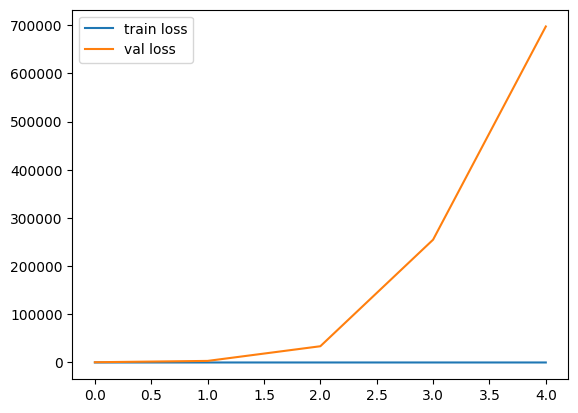

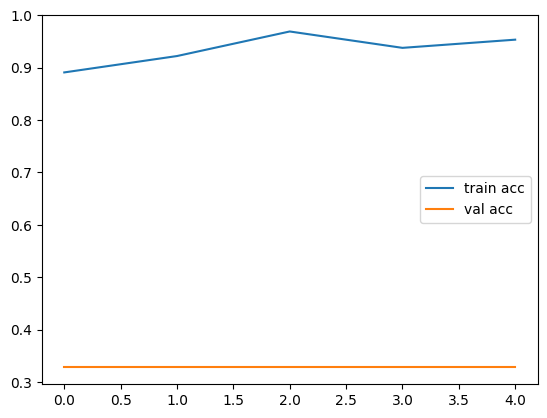

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:

y_pred = model.predict(test_set)


2/2 [==============================] - 12s 3s/step


In [24]:
y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_resnet50.h5')

In [38]:
img=image.load_img('C:\\Users\\suyog\\OneDrive\\Desktop\\Fireblaze\\PROJECT\\Deep-Learning-Car-Brand-master\\Datasets\\Test\\lamborghini\\11.jpg',
                   target_size=(224,224))



In [31]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

1/1 [==============================] - 4s 4s/step


array([[0., 0., 1.]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 334ms/step


In [37]:
a==1

array([False])